In [74]:
# import python libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [75]:
df = pd.read_csv("C:\\Users\\Apoorva kumar\\Downloads\\Diwali Sales Data.csv", encoding='unicode_escape')


In [76]:
df.shape

(11251, 15)

In [77]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [79]:
#drop unrelated/blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [80]:
#check for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [81]:
# drop null values
df.dropna(inplace=True)

In [82]:
# change data type
df['Amount'] = df['Amount'].astype('int')

In [83]:
df['Amount'].dtypes

dtype('int64')

In [84]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [85]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [86]:
# use describe() for specific columns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

### Gender

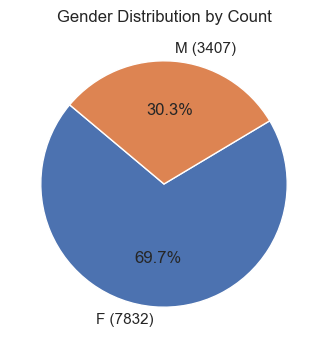

In [87]:
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(gender_counts, labels=[f"{label} ({count})" for label, count in zip(gender_counts.index, gender_counts)], 
        autopct='%1.1f%%', startangle=140)
plt.title("Gender Distribution by Count")
plt.show()

C:\Users\Apoorva kumar\AppData\Local\Temp\ipykernel_29684\2482249199.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Amount', data=sales_gen, palette='viridis')  # or any other color palette


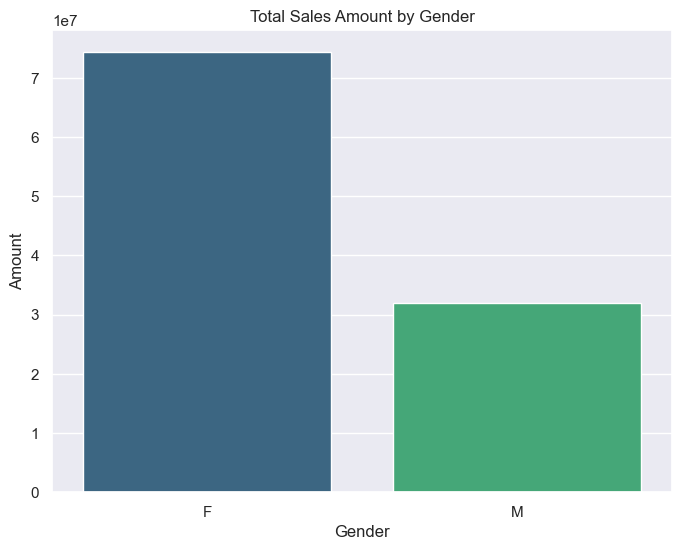

In [88]:
# plotting a bar chart for gender vs total amount

sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

# Plotting the bar chart with a color palette
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Amount', data=sales_gen, palette='viridis')  # or any other color palette

plt.title("Total Sales Amount by Gender")
plt.show()

*From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men*

### Age

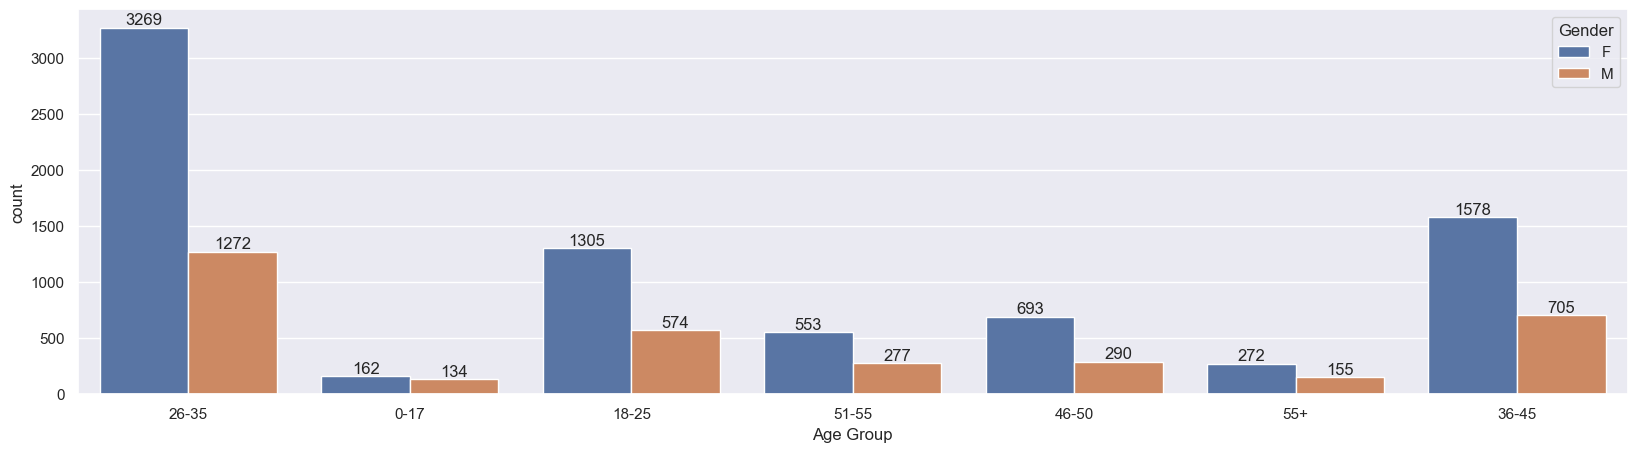

In [89]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

C:\Users\Apoorva kumar\AppData\Local\Temp\ipykernel_29684\2232465866.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age Group', y='Amount', data=sales_age, palette='viridis')  # You can change 'viridis' to any other palette


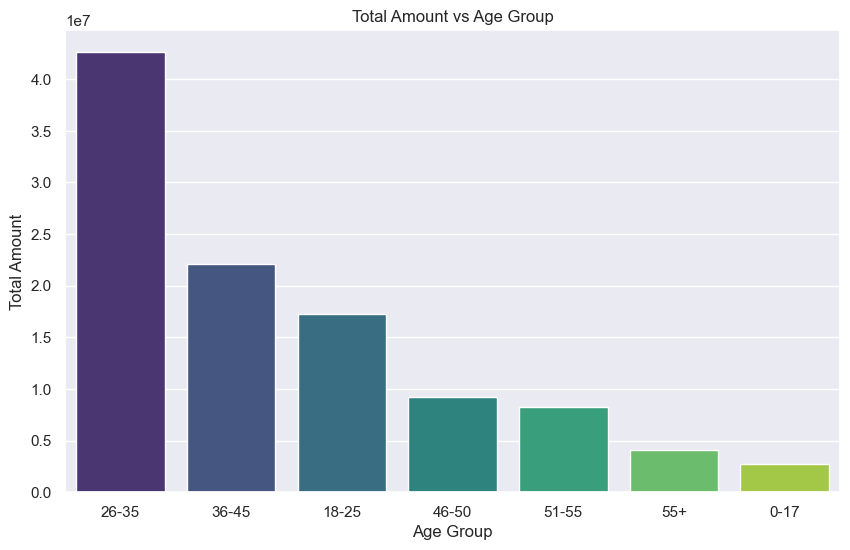

In [90]:
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

# Plotting the bar chart with a color palette
plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='Amount', data=sales_age, palette='viridis')  # You can change 'viridis' to any other palette

plt.title("Total Amount vs Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Amount")
plt.show()

*From above graphs we can see that most of the buyers are of age group between 26-35 yrs female*

### State

C:\Users\Apoorva kumar\AppData\Local\Temp\ipykernel_29684\687211830.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sales_state, x = 'State',y= 'Orders', palette='viridis')


<Axes: xlabel='State', ylabel='Orders'>

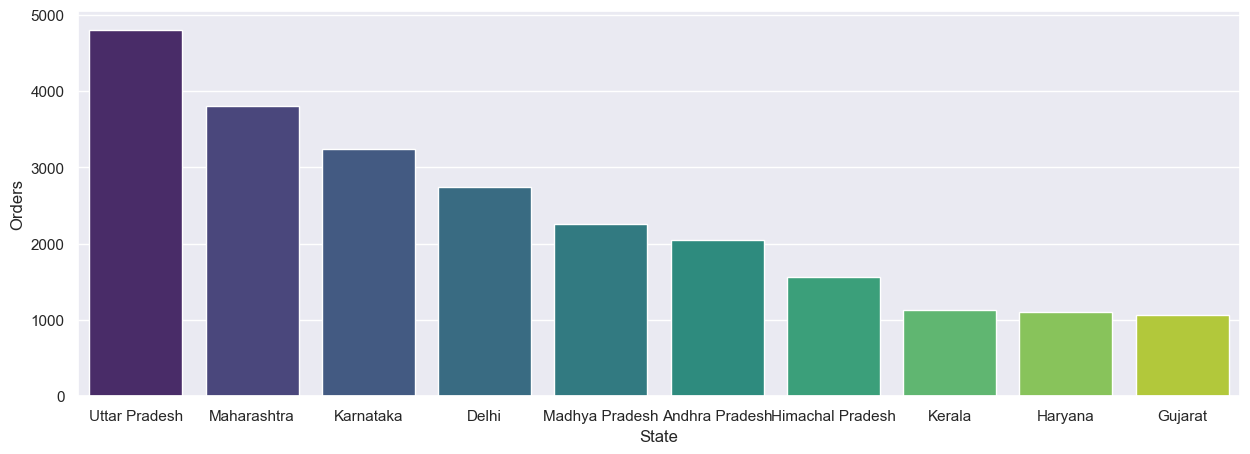

In [91]:
# total number of orders from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders', palette='viridis')

C:\Users\Apoorva kumar\AppData\Local\Temp\ipykernel_29684\4210227974.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sales_state, x = 'State',y= 'Amount', palette='viridis')


<Axes: xlabel='State', ylabel='Amount'>

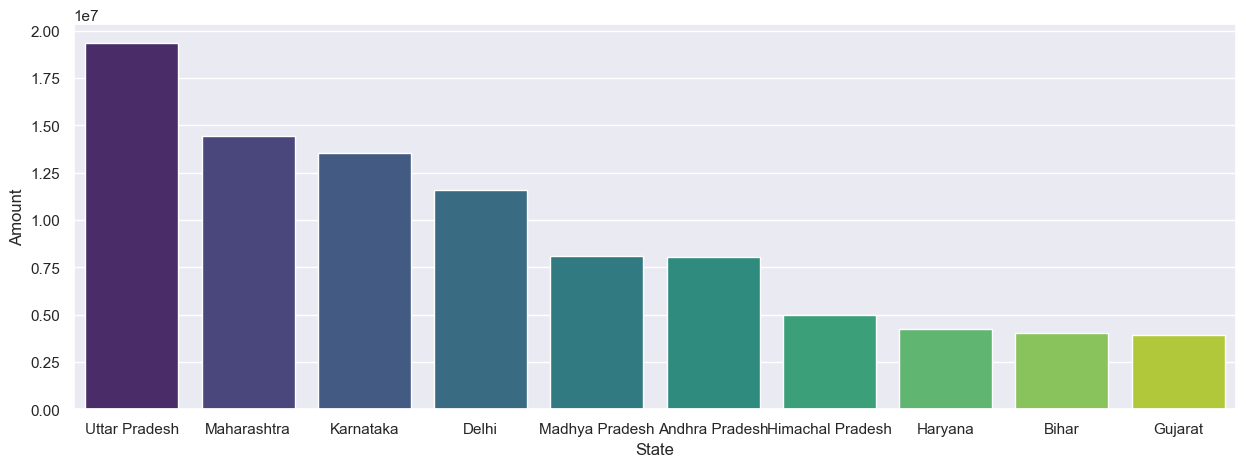

In [92]:
# total amount/sales from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount', palette='viridis')

*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*


### Marital Status

C:\Users\Apoorva kumar\AppData\Local\Temp\ipykernel_29684\4258208870.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Marital_Status', palette='viridis')


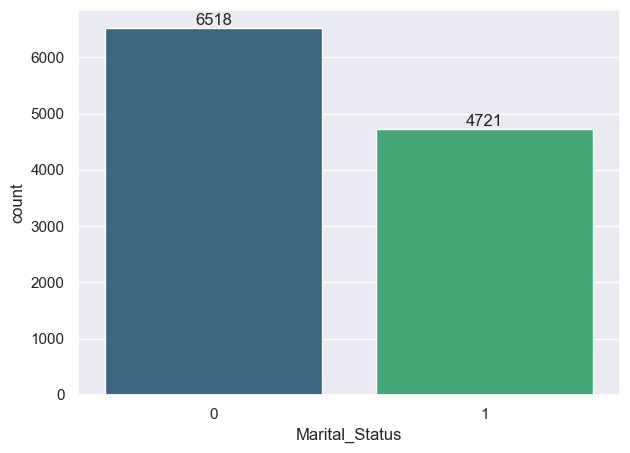

In [93]:
sns.set(rc={'figure.figsize': (7, 5)})

# Create the count plot with a palette
ax = sns.countplot(data=df, x='Marital_Status', palette='viridis')

# Add labels to each bar
for bars in ax.containers:
    ax.bar_label(bars)

# Display the plot
plt.show()


<Axes: xlabel='Marital_Status', ylabel='Amount'>

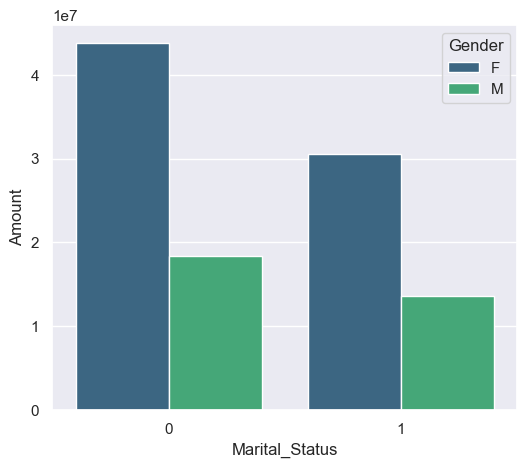

In [94]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender',palette='viridis')

*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

### Occupation

C:\Users\Apoorva kumar\AppData\Local\Temp\ipykernel_29684\251872703.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = df, x = 'Occupation',palette='viridis')


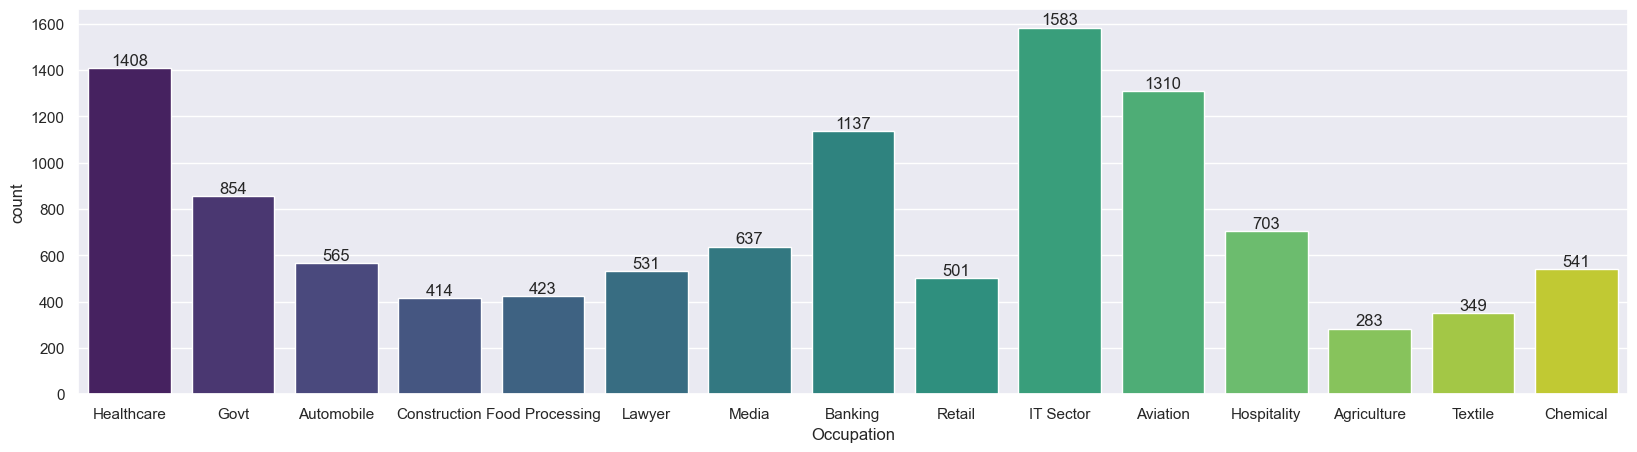

In [95]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation',palette='viridis')

for bars in ax.containers:
    ax.bar_label(bars)

C:\Users\Apoorva kumar\AppData\Local\Temp\ipykernel_29684\377715994.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount',palette='viridis')


<Axes: xlabel='Occupation', ylabel='Amount'>

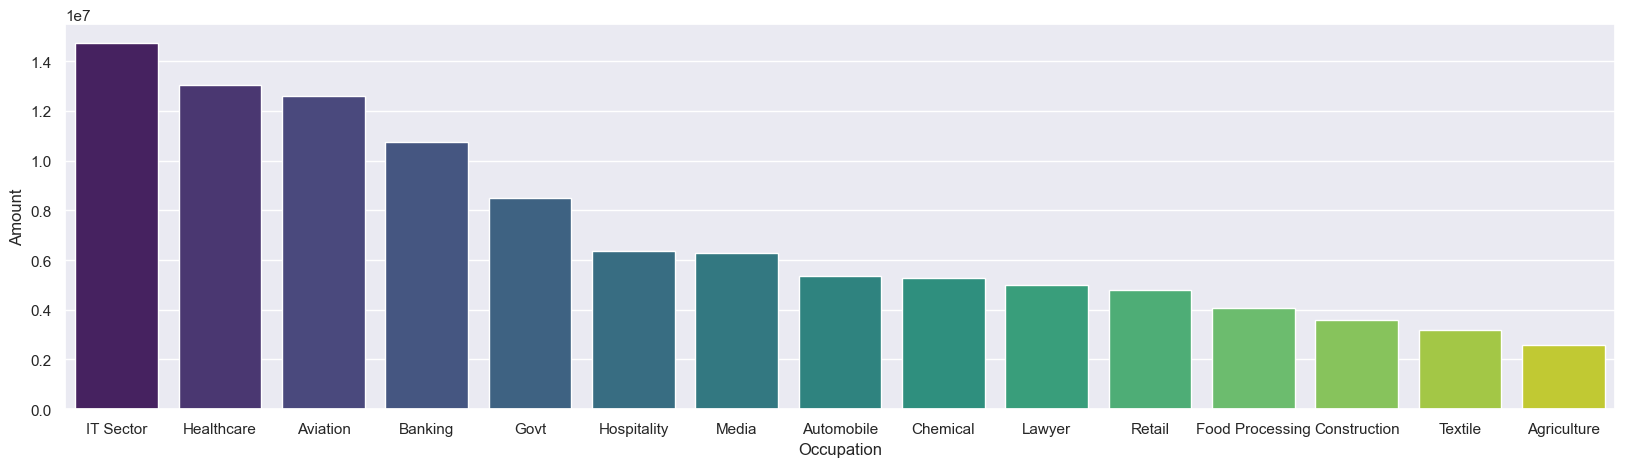

In [96]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount',palette='viridis')

*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

### Product Category

C:\Users\Apoorva kumar\AppData\Local\Temp\ipykernel_29684\155545809.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = df, x = 'Product_Category',palette='viridis')


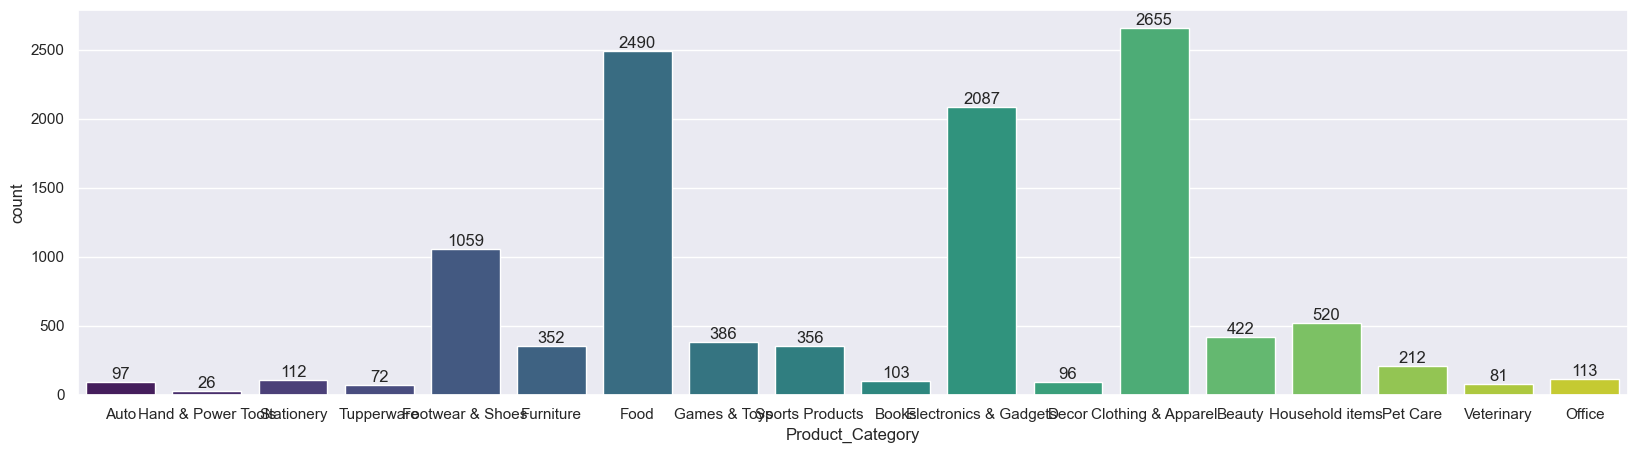

In [97]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Product_Category',palette='viridis')

for bars in ax.containers:
    ax.bar_label(bars)

C:\Users\Apoorva kumar\AppData\Local\Temp\ipykernel_29684\2197796482.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount',palette='viridis')


<Axes: xlabel='Product_Category', ylabel='Amount'>

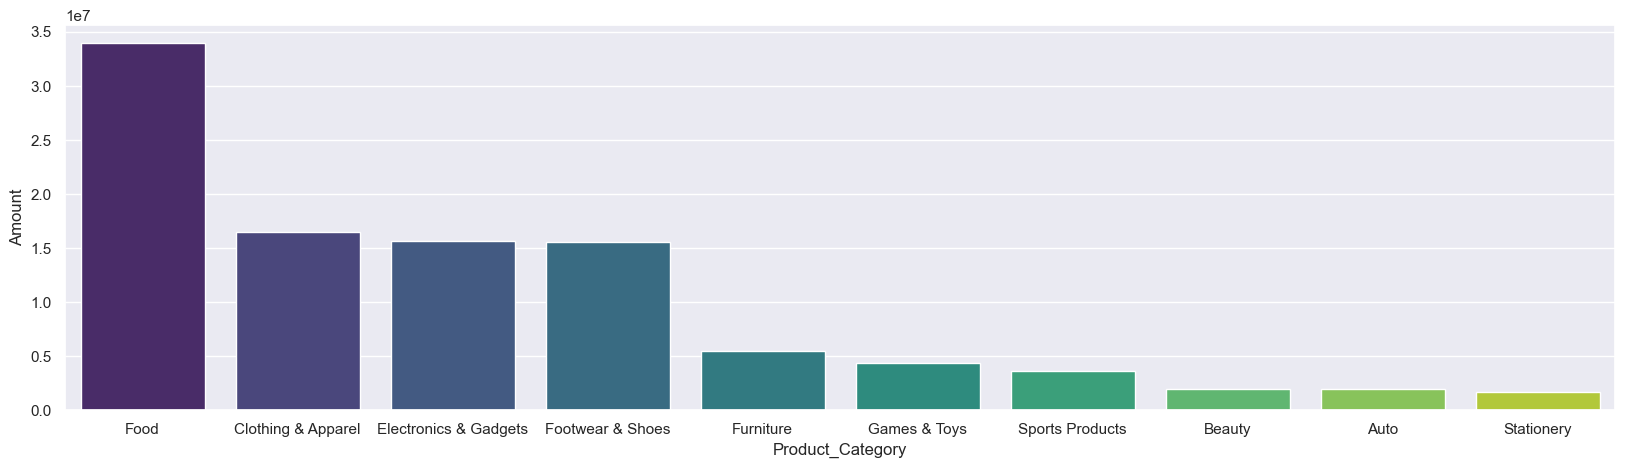

In [98]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount',palette='viridis')

*From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*

C:\Users\Apoorva kumar\AppData\Local\Temp\ipykernel_29684\2753330290.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders',palette='viridis')


<Axes: xlabel='Product_ID', ylabel='Orders'>

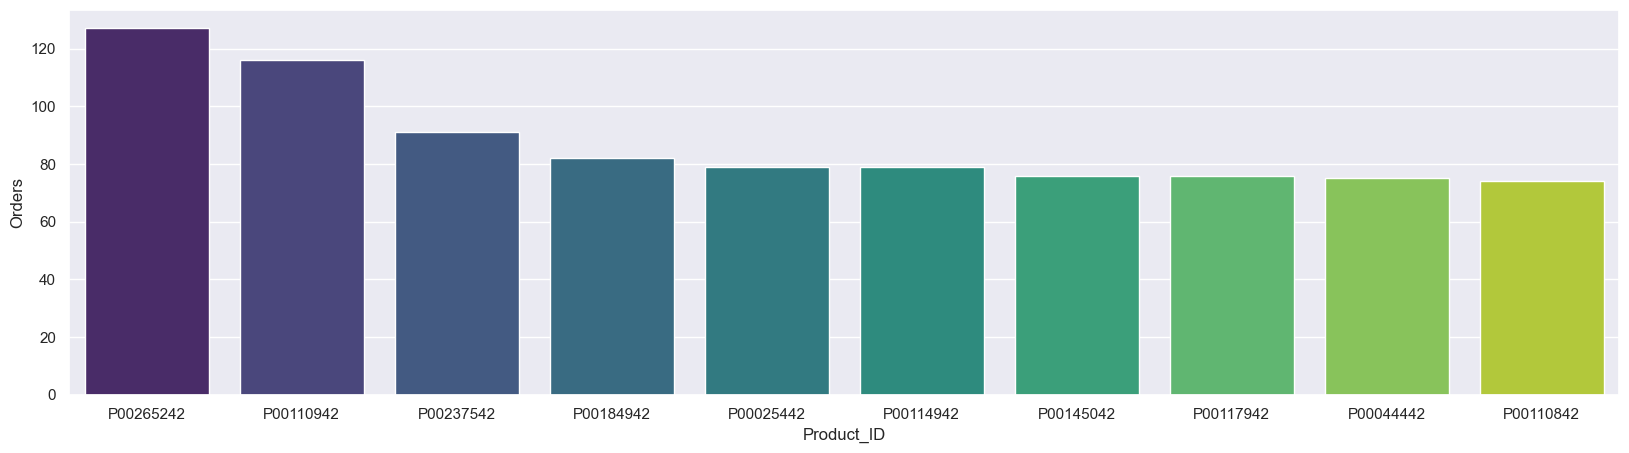

In [99]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders',palette='viridis')

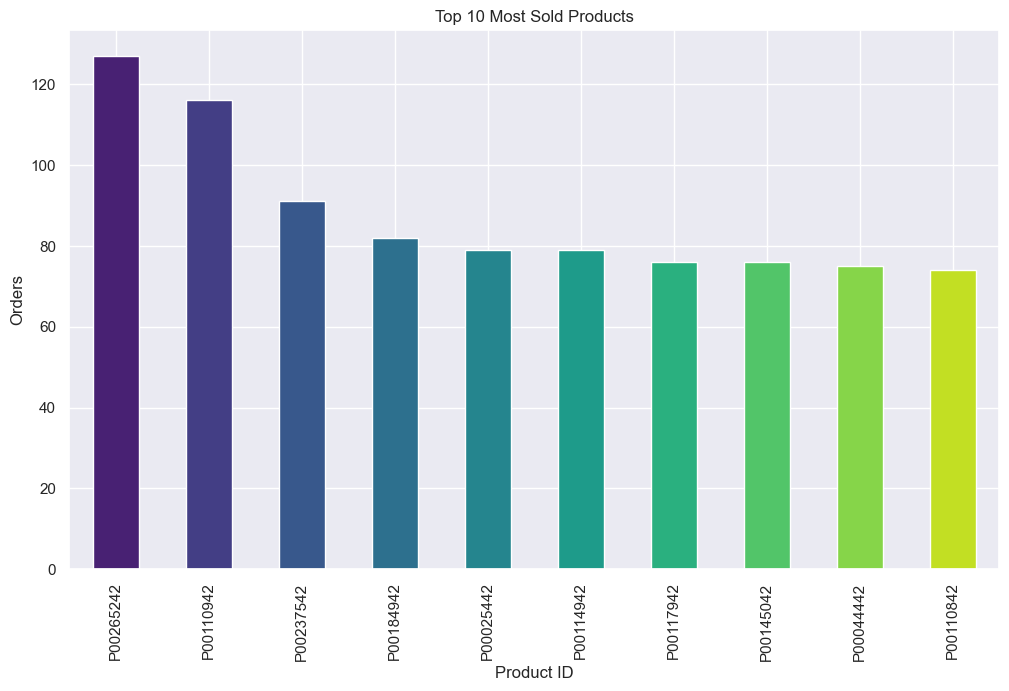

In [100]:
fig1, ax1 = plt.subplots(figsize=(12, 7))
top_products = df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False)
colors = sns.color_palette("viridis", len(top_products))  # Choose any palette like 'viridis', 'plasma', 'coolwarm'

top_products.plot(kind='bar', color=colors, ax=ax1)

ax1.set_title("Top 10 Most Sold Products")
ax1.set_xlabel("Product ID")
ax1.set_ylabel("Orders")
plt.show()

## Conclusion

*Married women age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category*